In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from scipy import stats
from scipy.stats import norm,skew

# from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [5]:
#get data 
# train = pd.read_csv("../input/train.csv")
# test = pd.read_csv("../input/test.csv")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print("The original dimension of train data : {}".format(train.shape))
print("The original dimension of test data : {}".format(test.shape))

The original dimension of train data : (1460, 81)
The original dimension of test data : (1459, 80)


In [6]:
#drop the id column from train and test data
train_id = train["Id"]
test_id = test["Id"]
train.drop("Id",axis=1,inplace=True)
test.drop("Id",axis=1,inplace=True)
print("The dimension of train data after dropping id : {}".format(train.shape))
print("The dimension of test data after dropping id : {}".format(test.shape))

The dimension of train data after dropping id : (1460, 80)
The dimension of test data after dropping id : (1459, 79)


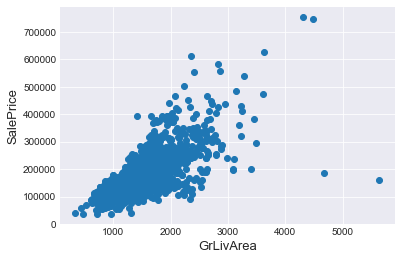

In [8]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

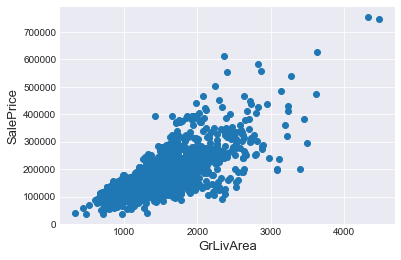

In [9]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

Text(0.5,1,u'SalePrice distribution')

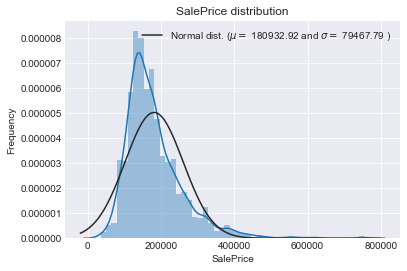

In [10]:
#The target/response variable is SalePrice in train data
#Checking the distribution of the target varible
sns.distplot(train['SalePrice'],fit=norm);
(mu, sigma) = norm.fit(train['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

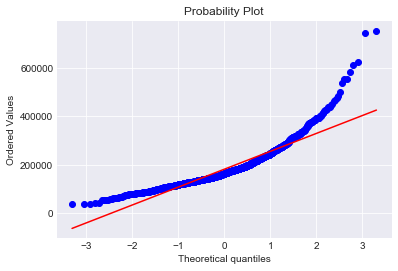

In [11]:
#Normality check on the response variable
res = stats.probplot(train['SalePrice'], plot=plt)

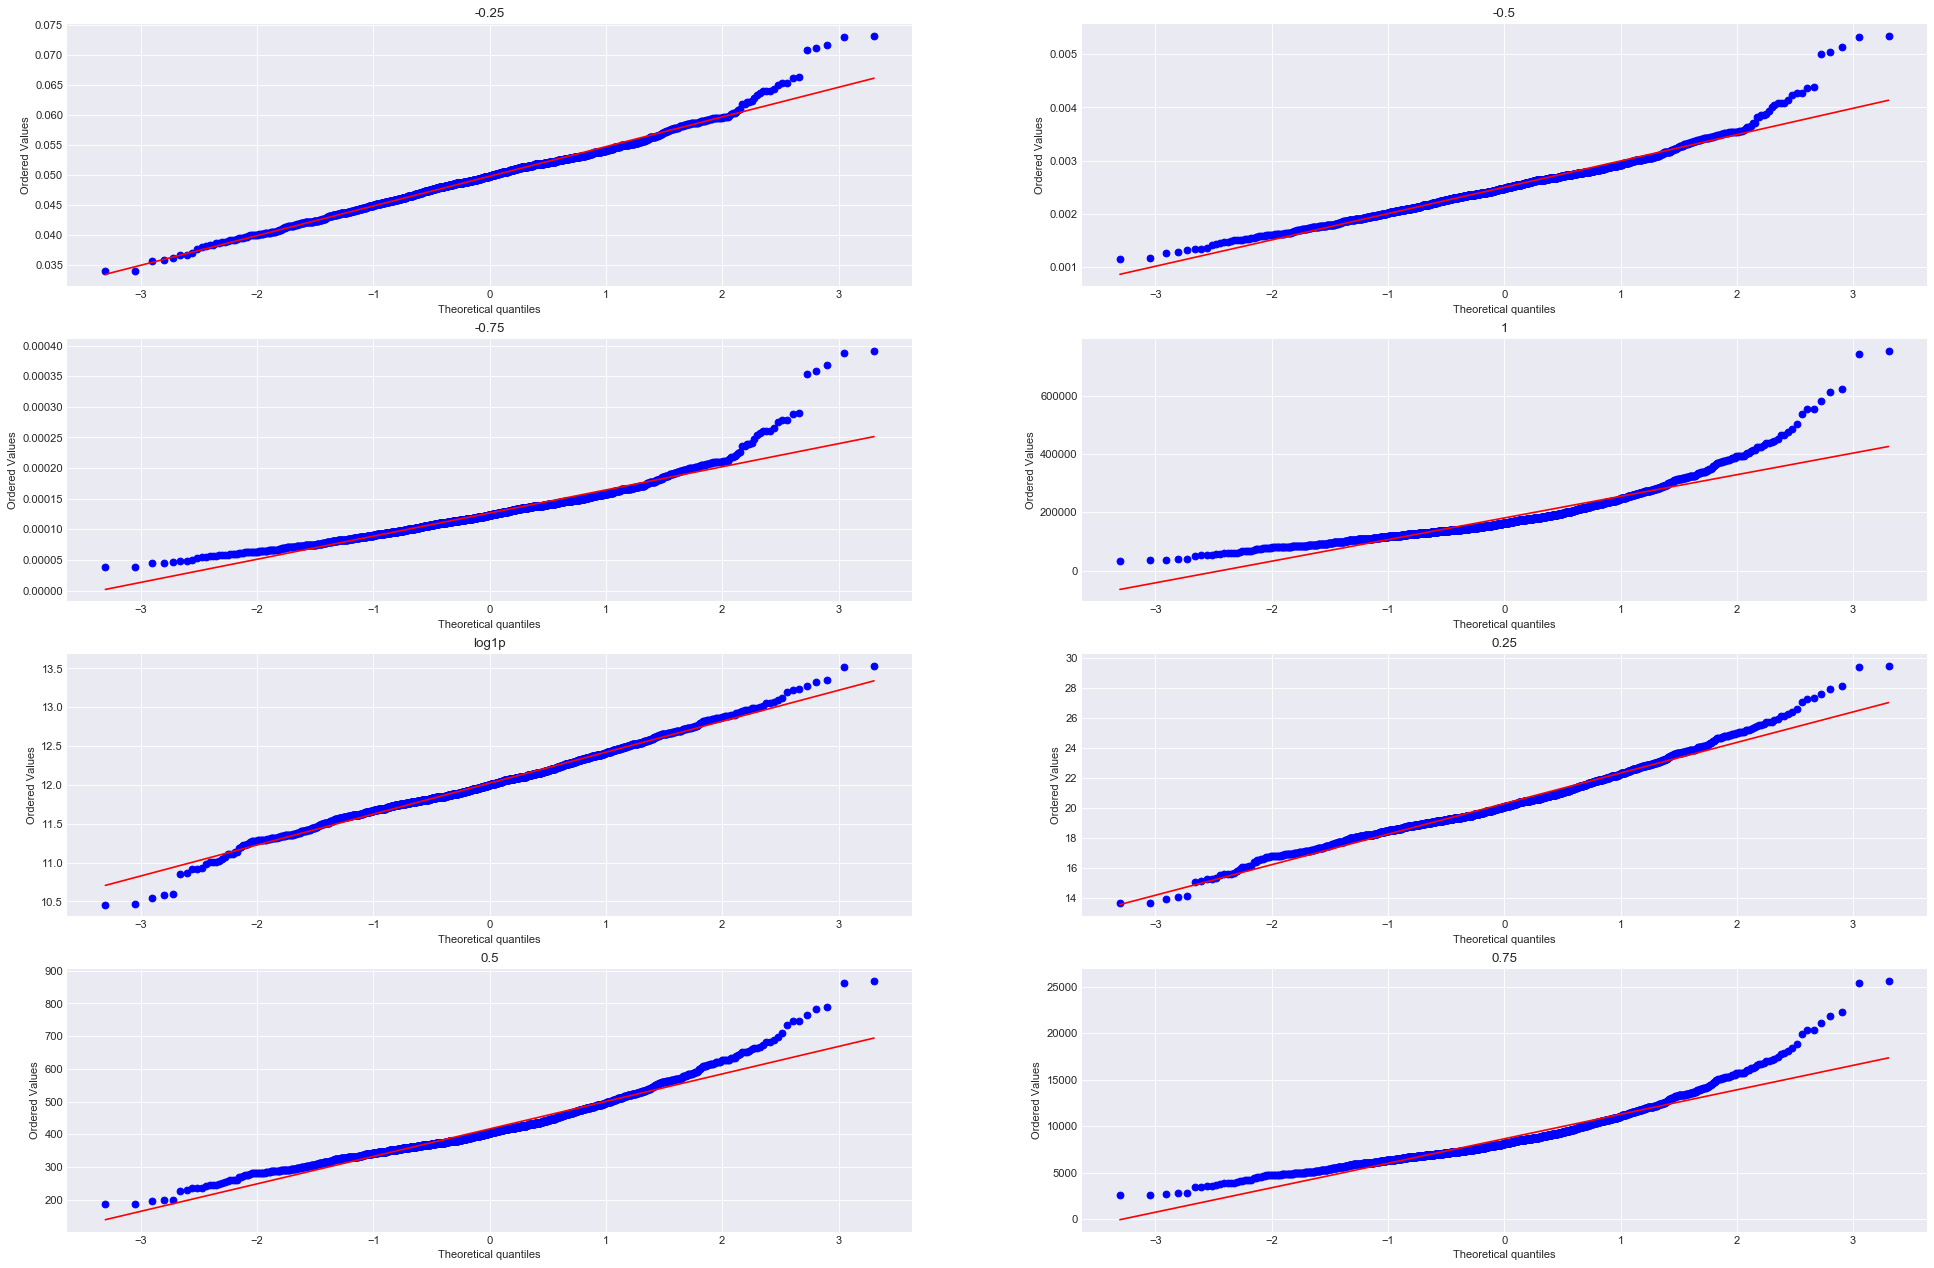

In [12]:
#The target variable is right skewed and the normality check fails for the target variable
#transform the target variable and check normaility
plt.figure(figsize=(30, 20), dpi=80, facecolor='w', edgecolor='k')
lst = ['-0.25','-0.5','-0.75','1','log1p','0.25','0.5','0.75']
def plot_norm(lst,plt):
    for i in range(len(lst)):
        plt.subplot(4,2,i+1)
        if not lst[i].startswith('log'):
            x = np.power(train['SalePrice'],float(lst[i]))
        else:
            x = np.log1p(train['SalePrice'])
        res = stats.probplot(x, plot=plt)
        plt.title(lst[i])
    plt.grid(True)
    return plt
plt = plot_norm(lst,plt)

plt.show()

In [13]:
#From the above log1p seems to make the target variable more normal
#we will transoform the response variable and get mean and standard dev of the distribution

train['SalePrice'] = np.log1p(train['SalePrice'])

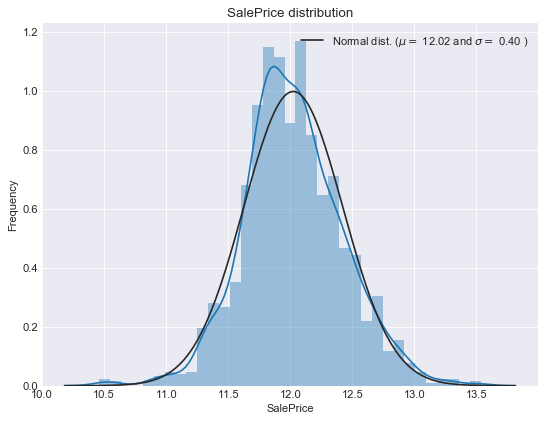

In [14]:
#We will try to plot the distribution of the response variable
plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

sns.distplot(train['SalePrice'],fit=norm)
(mu, sigma) = norm.fit(train['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8.0
fig_size[1] = 6.0
plt.rcParams["figure.figsize"] = fig_size

In [15]:
#combining both train and test data
train_n = train.shape[0]
test_n = test.shape[0]
y_train = train['SalePrice'].values
data = pd.concat([train, test], ignore_index=True)
data.drop(['SalePrice'], axis=1, inplace=True)
print("data size is : {}".format(data.shape))

data size is : (2917, 79)


In [16]:
data_na = data.isnull().sum()/len(data) *100
data_na = data_na.drop(data_na[data_na == 0].index)
data_na.sort_values(ascending=False,inplace=True)
data_na = pd.DataFrame({'Missing Ratio':data_na})
data_na

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageCond,5.450806
GarageFinish,5.450806
GarageYrBlt,5.450806


In [17]:
#For the following values column NA means there is no such utilities, so we can replace by None
for col in ('Alley','PoolQC','Fence','MiscFeature','FireplaceQu','GarageType', \
            'GarageFinish', 'GarageQual', 'GarageCond'):
    data[col] = data[col].fillna('None')

In [18]:
# For the following basement utilities NA means there is no basement available
for col in ('BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'):
    data[col] = data[col].fillna('None')

In [19]:
#check GarageYrBlt,GarageArea and GarageCars values
data[['GarageYrBlt','GarageArea','GarageCars']].head()

,GarageYrBlt,GarageArea,GarageCars
0,2003.0,548.0,2.0
1,1976.0,460.0,2.0
2,2001.0,608.0,2.0
3,1998.0,642.0,3.0
4,2000.0,836.0,3.0


In [20]:
#Replace the above values with 0 as there is no garage
for col in ('GarageYrBlt','GarageArea','GarageCars'):
    data[col] = data[col].fillna(0)

In [21]:
#let us check the following col values of basement
data[['BsmtFinSF2','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','BsmtFullBath', 'BsmtHalfBath']].head()

,BsmtFinSF2,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
0,0.0,706.0,150.0,856.0,1.0,0.0
1,0.0,978.0,284.0,1262.0,0.0,1.0
2,0.0,486.0,434.0,920.0,1.0,0.0
3,0.0,216.0,540.0,756.0,1.0,0.0
4,0.0,655.0,490.0,1145.0,1.0,0.0


In [22]:
#As these values represent in case of basement is present,
#we can replace NA to 0 as NA represent there is no basement 
#(and also the NA coutn varies from 1 to 2) 
for col in ('BsmtFinSF2','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','BsmtFullBath', 'BsmtHalfBath'):
    data[col] = data[col].fillna(0)

In [23]:
data['MasVnrType'] = data['MasVnrType'].fillna('None')

In [24]:
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)

In [25]:
#Replace the following with
for col in ('MSZoning','Electrical','KitchenQual','Exterior1st','Exterior2nd', 'SaleType'):
    data[col] = data[col].fillna(data[col].mode()[0])

In [26]:
#We drop Utilities as this doesn't help much in prediction
data = data.drop(['Utilities'],axis=1)

In [27]:
data['Functional'] = data["Functional"].fillna('Typ')

In [28]:
#let us check the count of remaining NA values 
data_na = data.isnull().sum()
data_na = data_na.drop(data_na[data_na == 0].index)
data_na.sort_values(ascending=False,inplace=True)
data_na = pd.DataFrame({'Missing Ratio':data_na})
data_na

,Missing Ratio
LotFrontage,486


In [29]:
#let us check the lotFrontage and change the NA value with neighbourhood lotfrontage 
data['LotFrontage']=data.groupby('Neighborhood')['LotFrontage'].apply(lambda x:x.fillna(x.median()))

In [30]:
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,None,3,1Fam,TA,No,706.0,0.0,...,Normal,WD,0,Pave,8,856.0,0,2003,2003,2008
1,1262,0,0,None,3,1Fam,TA,Gd,978.0,0.0,...,Normal,WD,0,Pave,6,1262.0,298,1976,1976,2007
2,920,866,0,None,3,1Fam,TA,Mn,486.0,0.0,...,Normal,WD,0,Pave,6,920.0,0,2001,2002,2008
3,961,756,0,None,3,1Fam,Gd,No,216.0,0.0,...,Abnorml,WD,0,Pave,7,756.0,0,1915,1970,2006
4,1145,1053,0,None,4,1Fam,TA,Av,655.0,0.0,...,Normal,WD,0,Pave,9,1145.0,192,2000,2000,2008


**Feature Engineering on the data**

*Convert Some of the numerical into categorical*

In [31]:
#Columns MSSubClass, OverallCond,OverallQual are integers but they represent class
#so we will convert them to string type
for col in ("MSSubClass","OverallCond","YrSold","MoSold"):
    data[col] = data[col].apply(str)

In [32]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(data[c].values)) 
    data[c] = lbl.transform(list(data[c].values))

# shape        
print('Shape data: {}'.format(data.shape))

Shape data: (2917, 78)


In [33]:
#Add new features to the data to have total square foot floor = TotalBsmnt + 1stFlrSF +2ndFlr
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
data.shape

(2917, 79)

In [34]:
numeric_feats = data.dtypes[data.dtypes != "object"].index
skewed_feats = data[numeric_feats].apply(lambda x:skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)



Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [35]:
skewness = skewness[abs(skewness) > 0.75]
skewed_features = skewness.index
data[skewed_features] = np.log1p(data[skewed_features])

In [36]:
data=pd.get_dummies(data)

In [37]:
train =data[:train_n]
test = data[train_n:]
print(train.shape)
print(test.shape)
print(y_train)

(1458, 220)
(1459, 220)
[ 12.24769912  12.10901644  12.31717117 ...,  12.49313327  11.86446927
  11.90159023]


**Applying Predictive model regularization **
>    Define the regularization from the scipy package

In [38]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV,Lasso
from sklearn.model_selection import cross_val_score

In [39]:
#Defining the model
model_ridge = Ridge()

#Regularization parameters
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]

#Cost Funciton root mean square error
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

#Get error from the cost function and take mean
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]

Text(0,0.5,u'rmse')

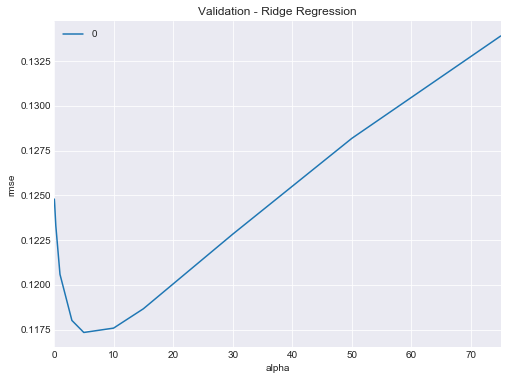

In [40]:
#take cost from ridge as pandas series
cv_ridge = pd.DataFrame(cv_ridge,index=alphas)
cv_ridge.plot(title = "Validation - Ridge Regression")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [41]:
print("The minimum cost using ridge regression is : {:.4f} at the alpha value of : {}".format(cv_ridge.min()[0],cv_ridge.idxmin()[0]))

The minimum cost using ridge regression is : 0.1173 at the alpha value of : 5.0


In [42]:
#Let us try to check about lasso
model_lasso = LassoCV(alphas=[1, 0.1, 0.001, 0.0005]).fit(train,y_train)

In [43]:
print("The cost error from lasso is : {:.4f}".format(rmse_cv(model_lasso).mean()))

The cost error from lasso is : 0.1147


In [44]:
coef = pd.Series(model_lasso.coef_, index = train.columns)

In [45]:
print("Lasso picked " + str(sum(coef != 0)) + \
      " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 92 variables and eliminated the other 128 variables


In [46]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

Text(0.5,1,u'Coefficients in the Lasso Model')

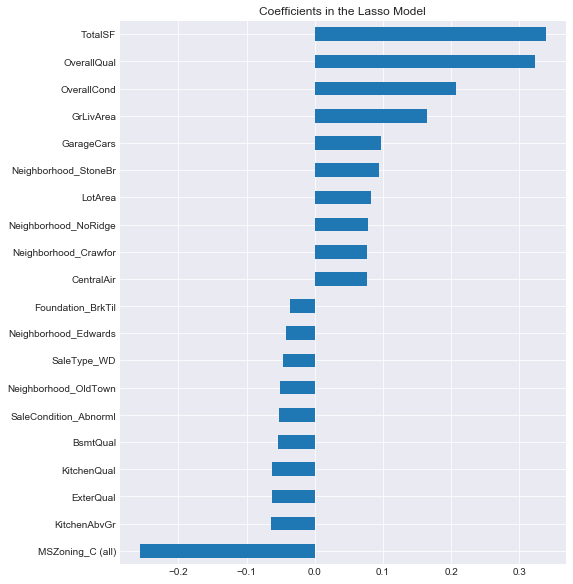

In [47]:
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")